In [1]:
import torch
from torch.utils.data import DataLoader,Dataset
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv(r'C:\Users\prith\Downloads\archive (1)\mnist_train.csv')

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
class MNISTDataset(Dataset):
    
    def __init__(self):
        raw_data = pd.read_csv(r'C:\Users\prith\Downloads\archive (1)\mnist_train.csv', dtype = np.float32, skiprows=1)
        np_data = np.array(raw_data)
        X_train = np_data[:,1:]
        Y_train = np_data[:,0]
        self.x = X_train
        self.y = Y_train
        self.count_samples = len(np_data)
        
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.count_samples
    
    def __getsizex__(self):
        return self.x.shape
    
    def __getsizey__(self):
        return self.y.shape

In [13]:
dataset = MNISTDataset()




(59999, 784)

In [21]:
dataloader = DataLoader(dataset,batch_size=128,shuffle=True)
# for features,labels in dataloader:
#     print((labels))                                    # prints labels in batches of 128 


# how does this work ??
# dataloader internally uses the getitem function to laod data so features = self.x[index] and labels = self.y[index]   

num_batches = math.ceil(dataset.count_samples/dataloader.batch_size)
print(num_batches)    
    


469


In [22]:
def custom_dataloader(batchsize):
    return DataLoader(dataset,batch_size=batchsize,shuffle=True)     # create a custom dataloader that uses pytorch builtin dataloader

In [24]:
class ManualDataLoader():
    
    def __init__(self,dataset,batchsize,shuffle = True):
        
        self.dataset = dataset
        self.batchsize = batchsize
        self.index = np.arange(len(dataset))
        self.shuffle = shuffle
        if self.shuffle:
            np.random.shuffle(self.index)
            
    def __iter__(self):
        self.start = 0
        return self
    
    def __next__(self):
        if self.start >= len(self.index):
            raise StopIteration
        
        end = self.start + self.batchsize       # end = start + batchsize
        
        batch_index = self.index[self.start : end]          
        
        batch = [self.dataset[i] for i in batch_index]    # create 
        
        self.start = end
        
        batch_x = []
        batch_y = []
        
        for feature,label in batch:
            batch_x.append(feature)
            batch_y.append(label)
        
        batch_x = np.stack(batch_x)
        batch_y = np.stack(batch_y)
        
        return batch_x,batch_y
        
        
        
        

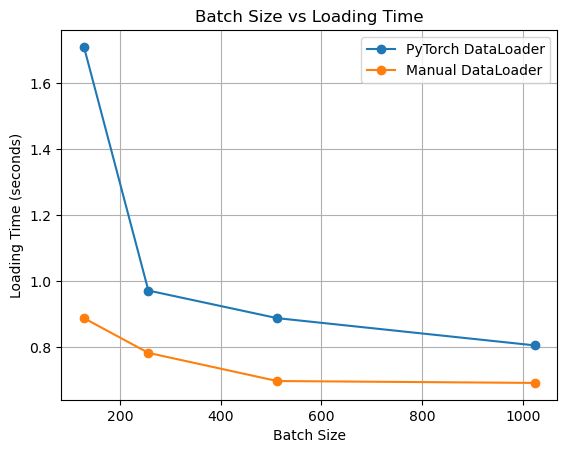

In [25]:
# # performance comparison : For learning purposes 

# import time
# import matplotlib.pyplot as plt

# def measure_loading(dataloader):
#     start_time = time.time()
#     x = []
#     y = []
#     for (features,labels) in dataloader:
#         x.append(features)
#         y.append(labels)   
    
#     return time.time()-start_time


# batch_sizes = [128,256,512,1024]

# pytorch_times = []
# manual_loader_times = []

# for batch_size in batch_sizes:
#     pytorch_loader = DataLoader(dataset,batch_size,shuffle=True)
#     manual_loader = ManualDataLoader(dataset, batch_size,shuffle=True)
    
#     pytorch_time = measure_loading(pytorch_loader)
#     manual_time = measure_loading(manual_loader)

#     pytorch_times.append(pytorch_time)
#     manual_loader_times.append(manual_time)



# plt.plot(batch_sizes, pytorch_times, label='PyTorch DataLoader', marker='o')
# plt.plot(batch_sizes, manual_loader_times, label='Manual DataLoader', marker='o')
# plt.xlabel('Batch Size')
# plt.ylabel('Loading Time (seconds)')
# plt.title('Batch Size vs Loading Time')
# plt.legend()
# plt.grid(True)
# plt.show()


In [26]:
import time
import matplotlib.pyplot as plt

def measure_loading_time(dataloader, num_batches):
    start_time = time.time()
    for i, (features, labels) in enumerate(dataloader):
        if i >= num_batches:
            break
    return time.time() - start_time

batch_sizes = [128, 256, 512, 1024]
num_batches = 10

pytorch_times = []
manual_times = []

for batch_size in batch_sizes:
    pytorch_loader = DataLoader(dataset, batch_size, shuffle=True)
    manual_loader = ManualDataLoader(dataset, batch_size, shuffle=True)
    
    pytorch_time = measure_loading_time(pytorch_loader, num_batches)
    manual_time = measure_loading_time(manual_loader, num_batches)
    
    pytorch_times.append(pytorch_time)
    manual_times.append(manual_time)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, pytorch_times, label='PyTorch DataLoader', marker='o')
plt.plot(batch_sizes, manual_times, label='Manual DataLoader', marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.title('Batch Size vs Loading Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: ManualDataLoader.__init__() got an unexpected keyword argument 'batch_size'